In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentNonStationary import EnvironmentNonStationary
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.UCBLearnerActive import UCBLearnerActive

%matplotlib inline

In [2]:
cust_json = "customer_classes.json"
today_customer = 50
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [0, 2, 0, 2, 0] 485.3619964 9.707239928


In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 2

In [4]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )


In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerActive(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
print(ucb6_learner.get_conv_rate_history())
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
conv_rate:  []
conv rate: [0.2222222222222222, 0.25, 0.0, 0.2, 0.1]
delta_: nan
conv_rate:  []
conv rate: [0.2222222222222222, 0.25, 0.0, 0.2, 0.1]
delta_: nan
conv_rate:  []
conv rate: [0.2222222222222222, 0.25, 0.0, 0.2, 0.1]
delta_: nan
conv_rate:  []
conv rate: [0.2222222222222222, 0.25, 0.0, 0.2, 0.1]
delta_: nan
conv_rate:  []
conv rate: [0.2222222222222222, 0.25, 0.0, 0.2, 0.1]
delta_: nan


/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/sofia/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[3, 3, 2, 3, 2]
conv_rate:  [0.2222222222222222]
conv rate: [0.14285714285714285, 0.15384615384615385, 0.625, 0.5, 0.46153846153846156]
delta_: 0.0
abrupt change
conv_rate:  [0.25]
conv rate: [0.14285714285714285, 0.15384615384615385, 0.625, 0.5, 0.46153846153846156]
delta_: 0.0
abrupt change
conv_rate:  []
conv rate: [0.14285714285714285, 0.15384615384615385, 0.625, 0.5, 0.46153846153846156]
delta_: nan
conv_rate:  [0.2]
conv rate: [0.14285714285714285, 0.15384615384615385, 0.625, 0.5, 0.46153846153846156]
delta_: 0.0
abrupt change
conv_rate:  []
conv rate: [0.14285714285714285, 0.15384615384615385, 0.625, 0.5, 0.46153846153846156]
delta_: nan
[3, 2, 2, 3, 2]
conv_rate:  [0.14285714285714285]
conv rate: [0.05555555555555555, 0.4, 0.2857142857142857, 0.2857142857142857, 0.18181818181818182]
delta_: 0.0
abrupt change
conv_rate:  []
conv rate: [0.05555555555555555, 0.4, 0.2857142857142857, 0.2857142857142857, 0.18181818181818182]
delta_: nan
conv_rate:  [0.625]
conv rate: [0.055555555555

[2, 2, 2, 3, 1]
conv_rate:  [0.19047619047619047]
conv rate: [0.14814814814814814, 0.14285714285714285, 0.5, 0.4, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.35714285714285715]
conv rate: [0.14814814814814814, 0.14285714285714285, 0.5, 0.4, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.6666666666666666]
conv rate: [0.14814814814814814, 0.14285714285714285, 0.5, 0.4, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.16666666666666666]
conv rate: [0.14814814814814814, 0.14285714285714285, 0.5, 0.4, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.375]
conv rate: [0.14814814814814814, 0.14285714285714285, 0.5, 0.4, 0.5]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 1]
conv_rate:  [0.0, 0.0]
conv rate: [0.2916666666666667, 0.6428571428571429, 0.625, 0.2857142857142857, 0.7]
delta_: 0.0
abrupt change
conv_rate:  [0.14285714285714285]
conv rate: [0.2916666666666667, 0.6428571428571429, 0.625, 0.2857142857142857, 0.7]
delta_: 0.0
abrupt change
conv_rate:  [0.5]
conv rate: [0.2916666666666667, 0.642857142

[3, 2, 2, 3, 1]
conv_rate:  [0.18181818181818182]
conv rate: [0.10714285714285714, 0.2857142857142857, 0.125, 1.0, 0.75]
delta_: 0.0
abrupt change
conv_rate:  [0.4117647058823529]
conv rate: [0.10714285714285714, 0.2857142857142857, 0.125, 1.0, 0.75]
delta_: 0.0
abrupt change
conv_rate:  [0.6363636363636364]
conv rate: [0.10714285714285714, 0.2857142857142857, 0.125, 1.0, 0.75]
delta_: 0.0
abrupt change
conv_rate:  [0.5]
conv rate: [0.10714285714285714, 0.2857142857142857, 0.125, 1.0, 0.75]
delta_: 0.0
abrupt change
conv_rate:  [0.7272727272727273]
conv rate: [0.10714285714285714, 0.2857142857142857, 0.125, 1.0, 0.75]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 1]
conv_rate:  [0.10714285714285714]
conv rate: [0.13636363636363635, 0.3333333333333333, 0.3, 0.6, 0.5555555555555556]
delta_: 0.0
abrupt change
conv_rate:  [0.2857142857142857]
conv rate: [0.13636363636363635, 0.3333333333333333, 0.3, 0.6, 0.5555555555555556]
delta_: 0.0
abrupt change
conv_rate:  [0.125]
conv rate: [0.1363636363636

[3, 2, 2, 3, 1]
conv_rate:  [0.19047619047619047]
conv rate: [0.043478260869565216, 0.3888888888888889, 0.36363636363636365, 0.0, 0.0]
delta_: 0.0
abrupt change
conv_rate:  [0.4]
conv rate: [0.043478260869565216, 0.3888888888888889, 0.36363636363636365, 0.0, 0.0]
delta_: 0.0
abrupt change
conv_rate:  [0.5384615384615384]
conv rate: [0.043478260869565216, 0.3888888888888889, 0.36363636363636365, 0.0, 0.0]
delta_: 0.0
abrupt change
conv_rate:  [0.2857142857142857]
conv rate: [0.043478260869565216, 0.3888888888888889, 0.36363636363636365, 0.0, 0.0]
delta_: 0.0
abrupt change
conv_rate:  [0.4]
conv rate: [0.043478260869565216, 0.3888888888888889, 0.36363636363636365, 0.0, 0.0]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 1]
conv_rate:  [0.043478260869565216]
conv rate: [0.12, 0.15384615384615385, 0.16666666666666666, 0.0, 0.5555555555555556]
delta_: 0.0
abrupt change
conv_rate:  [0.3888888888888889]
conv rate: [0.12, 0.15384615384615385, 0.16666666666666666, 0.0, 0.5555555555555556]
delta_: 0.0
a

loading: [=====                         ] 16.7%[3, 2, 2, 3, 1]
conv_rate:  [0.08]
conv rate: [0.05263157894736842, 0.4666666666666667, 0.3076923076923077, 0.5, 0.4166666666666667]
delta_: 0.0
abrupt change
conv_rate:  [0.23076923076923078]
conv rate: [0.05263157894736842, 0.4666666666666667, 0.3076923076923077, 0.5, 0.4166666666666667]
delta_: 0.0
abrupt change
conv_rate:  [0.625]
conv rate: [0.05263157894736842, 0.4666666666666667, 0.3076923076923077, 0.5, 0.4166666666666667]
delta_: 0.0
abrupt change
conv_rate:  [0.3333333333333333]
conv rate: [0.05263157894736842, 0.4666666666666667, 0.3076923076923077, 0.5, 0.4166666666666667]
delta_: 0.0
abrupt change
conv_rate:  [0.375]
conv rate: [0.05263157894736842, 0.4666666666666667, 0.3076923076923077, 0.5, 0.4166666666666667]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 1]
conv_rate:  [0.05263157894736842]
conv rate: [0.05555555555555555, 0.35714285714285715, 0.375, 0.6666666666666666, 0.625]
delta_: 0.0
abrupt change
conv_rate:  [0.466666666666

[3, 2, 2, 3, 2]
conv_rate:  [0.15]
conv rate: [0.2, 0.5, 0.2727272727272727, 0.3333333333333333, 0.4166666666666667]
delta_: 0.0
abrupt change
conv_rate:  [0.3888888888888889]
conv rate: [0.2, 0.5, 0.2727272727272727, 0.3333333333333333, 0.4166666666666667]
delta_: 0.0
abrupt change
conv_rate:  [0.21428571428571427]
conv rate: [0.2, 0.5, 0.2727272727272727, 0.3333333333333333, 0.4166666666666667]
delta_: 0.0
abrupt change
conv_rate:  [0.0]
conv rate: [0.2, 0.5, 0.2727272727272727, 0.3333333333333333, 0.4166666666666667]
delta_: 0.0
abrupt change
conv_rate:  [0.0]
conv rate: [0.2, 0.5, 0.2727272727272727, 0.3333333333333333, 0.4166666666666667]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 2]
conv_rate:  [0.2]
conv rate: [0.21052631578947367, 0.3181818181818182, 0.45454545454545453, 0.7, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.5]
conv rate: [0.21052631578947367, 0.3181818181818182, 0.45454545454545453, 0.7, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.2727272727272727]
conv rate: [0.210

[3, 2, 2, 2, 2]
conv_rate:  [0.09090909090909091]
conv rate: [0.2222222222222222, 0.16666666666666666, 0.25, 0.75, 0.25]
delta_: 0.0
abrupt change
conv_rate:  [0.4666666666666667]
conv rate: [0.2222222222222222, 0.16666666666666666, 0.25, 0.75, 0.25]
delta_: 0.0
abrupt change
conv_rate:  [0.5833333333333334]
conv rate: [0.2222222222222222, 0.16666666666666666, 0.25, 0.75, 0.25]
delta_: 0.0
abrupt change
conv_rate:  [0.6]
conv rate: [0.2222222222222222, 0.16666666666666666, 0.25, 0.75, 0.25]
delta_: 0.0
abrupt change
conv_rate:  [0.36363636363636365]
conv rate: [0.2222222222222222, 0.16666666666666666, 0.25, 0.75, 0.25]
delta_: 0.0
abrupt change
[3, 2, 2, 2, 2]
conv_rate:  [0.2222222222222222]
conv rate: [0.11764705882352941, 0.4666666666666667, 0.25, 0.8333333333333334, 0.25]
delta_: 0.0
abrupt change
conv_rate:  [0.16666666666666666]
conv rate: [0.11764705882352941, 0.4666666666666667, 0.25, 0.8333333333333334, 0.25]
delta_: 0.0
abrupt change
conv_rate:  [0.25]
conv rate: [0.117647058

[3, 2, 2, 3, 2]
conv_rate:  [0.3157894736842105]
conv rate: [0.2857142857142857, 0.45454545454545453, 0.5, 0.5, 0.2222222222222222]
delta_: 0.0
abrupt change
conv_rate:  [0.29411764705882354]
conv rate: [0.2857142857142857, 0.45454545454545453, 0.5, 0.5, 0.2222222222222222]
delta_: 0.0
abrupt change
conv_rate:  [0.45454545454545453]
conv rate: [0.2857142857142857, 0.45454545454545453, 0.5, 0.5, 0.2222222222222222]
delta_: 0.0
abrupt change
conv_rate:  [0.3333333333333333]
conv rate: [0.2857142857142857, 0.45454545454545453, 0.5, 0.5, 0.2222222222222222]
delta_: 0.0
abrupt change
conv_rate:  [0.23076923076923078]
conv rate: [0.2857142857142857, 0.45454545454545453, 0.5, 0.5, 0.2222222222222222]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 2]
conv_rate:  [0.2857142857142857]
conv rate: [0.10526315789473684, 0.3076923076923077, 0.3, 0.14285714285714285, 0.375]
delta_: 0.0
abrupt change
conv_rate:  [0.45454545454545453]
conv rate: [0.10526315789473684, 0.3076923076923077, 0.3, 0.1428571428571428

[3, 2, 2, 2, 2]
conv_rate:  [0.3684210526315789]
conv rate: [0.05263157894736842, 0.47058823529411764, 0.375, 0.5, 0.14285714285714285]
delta_: 0.0
abrupt change
conv_rate:  [0.30434782608695654]
conv rate: [0.05263157894736842, 0.47058823529411764, 0.375, 0.5, 0.14285714285714285]
delta_: 0.0
abrupt change
conv_rate:  [0.2727272727272727]
conv rate: [0.05263157894736842, 0.47058823529411764, 0.375, 0.5, 0.14285714285714285]
delta_: 0.0
abrupt change
conv_rate:  [0.6666666666666666]
conv rate: [0.05263157894736842, 0.47058823529411764, 0.375, 0.5, 0.14285714285714285]
delta_: 0.0
abrupt change
conv_rate:  [0.6666666666666666]
conv rate: [0.05263157894736842, 0.47058823529411764, 0.375, 0.5, 0.14285714285714285]
delta_: 0.0
abrupt change
[3, 2, 2, 2, 2]
conv_rate:  [0.05263157894736842]
conv rate: [0.3, 0.23076923076923078, 0.3333333333333333, 0.2857142857142857, 0.3333333333333333]
delta_: 0.0
abrupt change
conv_rate:  [0.47058823529411764]
conv rate: [0.3, 0.23076923076923078, 0.33333

loading: [===========                   ] 36.7%[3, 2, 2, 2, 2]
conv_rate:  [0.12]
conv rate: [0.2727272727272727, 0.3888888888888889, 0.6666666666666666, 0.6666666666666666, 0.14285714285714285]
delta_: 0.0
abrupt change
conv_rate:  [0.3125]
conv rate: [0.2727272727272727, 0.3888888888888889, 0.6666666666666666, 0.6666666666666666, 0.14285714285714285]
delta_: 0.0
abrupt change
conv_rate:  [0.4444444444444444]
conv rate: [0.2727272727272727, 0.3888888888888889, 0.6666666666666666, 0.6666666666666666, 0.14285714285714285]
delta_: 0.0
abrupt change
conv_rate:  [0.0]
conv rate: [0.2727272727272727, 0.3888888888888889, 0.6666666666666666, 0.6666666666666666, 0.14285714285714285]
delta_: 0.0
abrupt change
conv_rate:  [0.4]
conv rate: [0.2727272727272727, 0.3888888888888889, 0.6666666666666666, 0.6666666666666666, 0.14285714285714285]
delta_: 0.0
abrupt change
[3, 2, 2, 2, 2]
conv_rate:  [0.2727272727272727]
conv rate: [0.16, 0.35, 0.2, 0.5, 0.6666666666666666]
delta_: 0.0
abrupt change
conv

[3, 2, 2, 3, 1]
conv_rate:  [0.3157894736842105]
conv rate: [0.15384615384615385, 0.3076923076923077, 0.6666666666666666, 0.6666666666666666, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.26666666666666666]
conv rate: [0.15384615384615385, 0.3076923076923077, 0.6666666666666666, 0.6666666666666666, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.1111111111111111]
conv rate: [0.15384615384615385, 0.3076923076923077, 0.6666666666666666, 0.6666666666666666, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.0]
conv rate: [0.15384615384615385, 0.3076923076923077, 0.6666666666666666, 0.6666666666666666, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.3]
conv rate: [0.15384615384615385, 0.3076923076923077, 0.6666666666666666, 0.6666666666666666, 0.5]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 1]
conv_rate:  [0.15384615384615385]
conv rate: [0.3333333333333333, 0.2222222222222222, 0.36363636363636365, 0.4, 0.45454545454545453]
delta_: 0.0
abrupt change
conv_rate:  [0.3076923076923077]
conv rate: [0.333333

[3, 2, 2, 3, 1]
conv_rate:  [0.35]
conv rate: [0.16666666666666666, 0.4444444444444444, 0.0, 0.2222222222222222, 0.45454545454545453]
delta_: 0.0
abrupt change
conv_rate:  [0.47058823529411764]
conv rate: [0.16666666666666666, 0.4444444444444444, 0.0, 0.2222222222222222, 0.45454545454545453]
delta_: 0.0
abrupt change
conv_rate:  [0.5625]
conv rate: [0.16666666666666666, 0.4444444444444444, 0.0, 0.2222222222222222, 0.45454545454545453]
delta_: 0.0
abrupt change
conv_rate:  [0.5]
conv rate: [0.16666666666666666, 0.4444444444444444, 0.0, 0.2222222222222222, 0.45454545454545453]
delta_: 0.0
abrupt change
conv_rate:  [0.45454545454545453]
conv rate: [0.16666666666666666, 0.4444444444444444, 0.0, 0.2222222222222222, 0.45454545454545453]
delta_: 0.0
[3, 2, 2, 3, 1]
conv_rate:  [0.16666666666666666]
conv rate: [0.13793103448275862, 0.5333333333333333, 0.3333333333333333, 0.42857142857142855, 0.7777777777777778]
delta_: 0.0
abrupt change
conv_rate:  [0.4444444444444444]
conv rate: [0.1379310344

[3, 2, 2, 3, 1]
conv_rate:  [0.21052631578947367]
conv rate: [0.2631578947368421, 0.3333333333333333, 0.25, 0.2727272727272727, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.35714285714285715]
conv rate: [0.2631578947368421, 0.3333333333333333, 0.25, 0.2727272727272727, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.2727272727272727]
conv rate: [0.2631578947368421, 0.3333333333333333, 0.25, 0.2727272727272727, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.7142857142857143]
conv rate: [0.2631578947368421, 0.3333333333333333, 0.25, 0.2727272727272727, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.375]
conv rate: [0.2631578947368421, 0.3333333333333333, 0.25, 0.2727272727272727, 0.5]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 1]
conv_rate:  [0.2631578947368421]
conv rate: [0.1111111111111111, 0.2857142857142857, 0.2, 0.16666666666666666, 0.6666666666666666]
delta_: 0.0
abrupt change
conv_rate:  [0.3333333333333333]
conv rate: [0.1111111111111111, 0.2857142857142857, 0.2, 0.16666666666666666, 0

[3, 2, 2, 3, 1]
conv_rate:  [0.10526315789473684]
conv rate: [0.23076923076923078, 0.5384615384615384, 0.2, 0.4, 0.5384615384615384]
delta_: 0.0
abrupt change
conv_rate:  [0.4117647058823529]
conv rate: [0.23076923076923078, 0.5384615384615384, 0.2, 0.4, 0.5384615384615384]
delta_: 0.0
abrupt change
conv_rate:  [0.5]
conv rate: [0.23076923076923078, 0.5384615384615384, 0.2, 0.4, 0.5384615384615384]
delta_: 0.0
abrupt change
conv_rate:  [0.4]
conv rate: [0.23076923076923078, 0.5384615384615384, 0.2, 0.4, 0.5384615384615384]
delta_: 0.0
conv_rate:  [0.5]
conv rate: [0.23076923076923078, 0.5384615384615384, 0.2, 0.4, 0.5384615384615384]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 1]
conv_rate:  [0.23076923076923078]
conv rate: [0.2857142857142857, 0.391304347826087, 0.6, 0.5, 0.3333333333333333]
delta_: 0.0
abrupt change
conv_rate:  [0.5384615384615384]
conv rate: [0.2857142857142857, 0.391304347826087, 0.6, 0.5, 0.3333333333333333]
delta_: 0.0
abrupt change
conv_rate:  [0.2]
conv rate: [0.285

[3, 2, 2, 3, 1]
conv_rate:  [0.18518518518518517]
conv rate: [0.35, 0.16666666666666666, 0.375, 0.4, 0.375]
delta_: 0.0
abrupt change
conv_rate:  [0.4]
conv rate: [0.35, 0.16666666666666666, 0.375, 0.4, 0.375]
delta_: 0.0
abrupt change
conv_rate:  [0.8333333333333334]
conv rate: [0.35, 0.16666666666666666, 0.375, 0.4, 0.375]
delta_: 0.0
abrupt change
conv_rate:  [0.16666666666666666]
conv rate: [0.35, 0.16666666666666666, 0.375, 0.4, 0.375]
delta_: 0.0
abrupt change
conv_rate:  [0.5, 0.5]
conv rate: [0.35, 0.16666666666666666, 0.375, 0.4, 0.375]
delta_: 0.0
abrupt change
loading: [=================             ] 56.7%[3, 2, 2, 3, 1]
conv_rate:  [0.35]
conv rate: [0.3333333333333333, 0.3333333333333333, 0.2, 0.2857142857142857, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.16666666666666666]
conv rate: [0.3333333333333333, 0.3333333333333333, 0.2, 0.2857142857142857, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.375]
conv rate: [0.3333333333333333, 0.3333333333333333, 0.2, 0.28571428571

[3, 2, 2, 3, 1]
conv_rate:  [0.15384615384615385]
conv rate: [0.14285714285714285, 0.4, 0.3, 0.2, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.5]
conv rate: [0.14285714285714285, 0.4, 0.3, 0.2, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.2]
conv rate: [0.14285714285714285, 0.4, 0.3, 0.2, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.3333333333333333]
conv rate: [0.14285714285714285, 0.4, 0.3, 0.2, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.45454545454545453]
conv rate: [0.14285714285714285, 0.4, 0.3, 0.2, 0.5]
delta_: 0.0
abrupt change
[3, 2, 2, 3, 1]
conv_rate:  [0.14285714285714285]
conv rate: [0.16666666666666666, 0.47058823529411764, 0.3333333333333333, 1.0, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.4]
conv rate: [0.16666666666666666, 0.47058823529411764, 0.3333333333333333, 1.0, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.3]
conv rate: [0.16666666666666666, 0.47058823529411764, 0.3333333333333333, 1.0, 0.5]
delta_: 0.0
abrupt change
conv_rate:  [0.2]
conv rate: [0.1666

KeyboardInterrupt: 

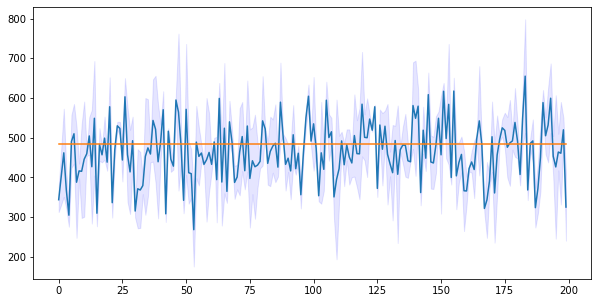

In [20]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

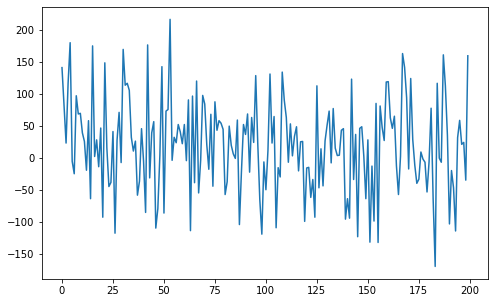

In [21]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

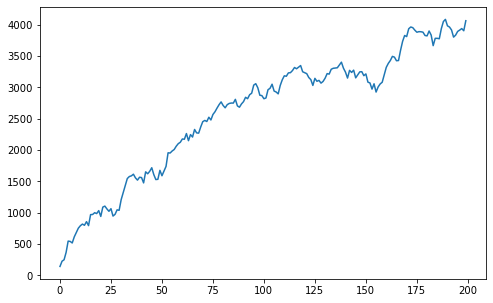

In [22]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

In [8]:
n_products

5

In [9]:
n_arms

4

In [35]:
from random import randrange
array = np.zeros((n_products,n_arms))
for i in range(n_products):
    for j in range(n_arms):
        array[i,j] = randrange(1,10) /10

In [36]:
array

array([[0.6, 0.6, 0.2, 0.4],
       [0.4, 0.4, 0.7, 0.8],
       [0.3, 0.9, 0.1, 0.8],
       [0.4, 0.8, 0.5, 0.9],
       [0.2, 0.9, 0.7, 0.2]])

In [16]:
randrange(0,1)

2